# (1) Delivery_time 

In [1]:
# Importing liberies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [19]:
# Read Data

df = pd.read_csv(r"D:\Assignment\Simple Linear Regression\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Feature Engineering

In [3]:
# Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA and Data Visualization


In [4]:
df.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

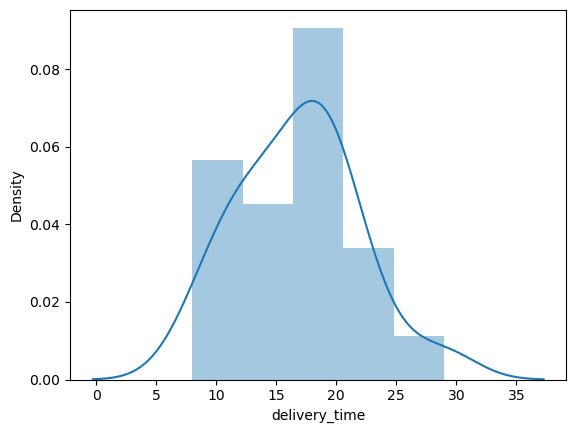

In [6]:
sns.distplot(df['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

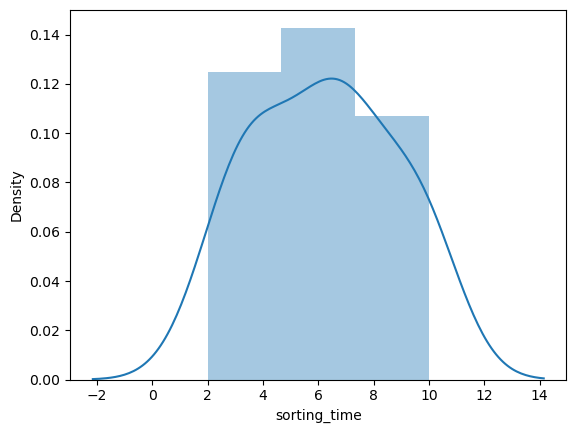

In [7]:
sns.distplot(df['sorting_time'])

## Correlation Analysis

In [8]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

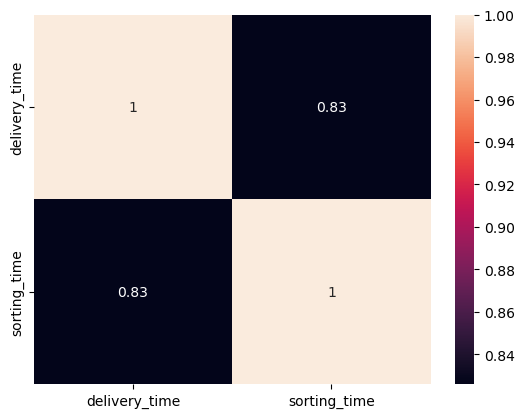

In [9]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

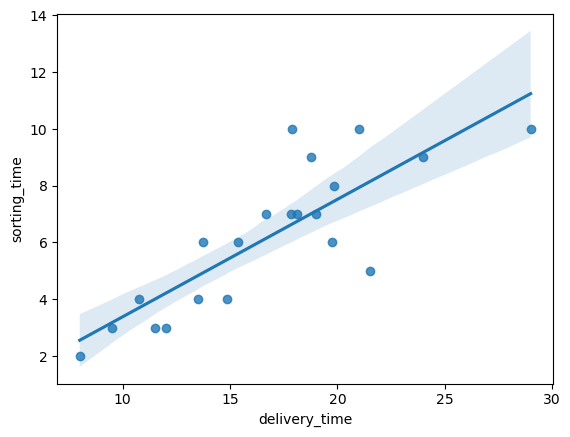

In [10]:
sns.regplot(df['delivery_time'], df['sorting_time'])

## Model Building

In [11]:
model = smf.ols('delivery_time ~ sorting_time', data=df).fit()

In [12]:
model

### Model Testing

In [13]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
# Finding tvalues and pvalues
print(model.tvalues,model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [15]:
# Finding Rsquared Values
print(model.rsquared, model.rsquared_adj)

0.6822714748417231 0.6655489208860244


## Model Predictions

In [16]:
# Manual prediction 
# y = m(x) + c

delivery_time = (1.649020 * 16)+ 6.582734
delivery_time

34.27134966704

In [17]:
# Automatic Prediction

new_data = pd.Series([2,6,8,9])
new_data = pd.DataFrame(new_data,columns=['sorting_time'])
new_data

,sorting_time
0,2
1,6
2,8
3,9


In [18]:
model.predict(new_data)

0     9.880774
1    16.476853
2    19.774893
3    21.423913
dtype: float64